<a href="https://www.kaggle.com/code/safaafathii/twitter-sentiment-analysis-logistic-naive-bayes?scriptVersionId=113314059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Context

#### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
#### Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, our objective is to predict the labels on the test dataset.

# Import Libraries

In [ ]:
!pip install tqdm

In [ ]:
import nltk                               
import matplotlib.pyplot as plt           
import random  

import re                                
import string                            

from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer       
from nltk.tokenize import TweetTokenizer

from tqdm import tqdm

# Read Twitter Sentiment Analysis Data

In [ ]:
df_train = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/train.csv",index_col = "id")
df_test = pd.read_csv("../input/twitter-sentiment-analysis-hatred-speech/test.csv",index_col = "id")

df_train.head()

# Explore Data

#### We'll use NLTK Package, an open-source Python library for natural language processing.

#### Total Number of Tweets

In [ ]:
df_train.shape

#### Total Numeber of Negative Tweets

In [ ]:
df_train[df_train["label"]==1].shape

#### Total Numeber of Positive Tweets

In [ ]:
df_train[df_train["label"]==0].shape

#### Create a Pie Chart Between Number of Pos and Neg Tweets

In [ ]:
fig = plt.figure(figsize=(5, 5))
labels = 'Positives', 'Negative'
sizes = [df_train[df_train["label"]==0].shape[0], df_train[df_train["label"]==1].shape[0]] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

#### There're a noticeable imbalancing in data

#### Split Training Data To All Positive and All Negative Tweets

In [ ]:
df_neg = df_train[df_train["label"]==1]
df_neg.shape

In [ ]:
df_pos = df_train[df_train["label"]==0]
df_pos.shape

#### Show Random Pos and Random Neg Tweets

In [ ]:
# print positive in greeen
print('\033[92m' + df_pos.iloc[random.randint(0,29720),1])

# print negative in red
print('\033[91m' + df_neg.iloc[random.randint(0,2242),1])

# Preprocessing

## Steps:
#### 1. Tokenizing the Strings
#### 2. Lowercasing
#### 3. Removing Stopwords and Punctuations
#### 4. Stemming

#### Trying to clean a single random tweet first

In [ ]:
tweet =  df_pos.iloc[random.randint(0,29720),1]

In [ ]:
tweet

#### Remove old style retweet text "RT"

In [ ]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

#### Remove hyperlinks

In [ ]:
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

#### Remove Hashsign "#"

In [ ]:
tweet2 = re.sub(r'#', '', tweet2)
print('\033[92m' + tweet)
print('\033[94m')

print(tweet2)

#### Tokenize the String

In [ ]:
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)

#### Remove stop words and punctuations

In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

#### Stemming

In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

## Apply Preprocessing to the whole dataset

In [ ]:
df_neg.head()

In [ ]:
def preprocessing(df):
    try:
        # Remove old style retweet text "RT"
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'^RT[\s]+', '', x))
    
        # Remove Hyperlinks
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'https?:\/\/.*[\r\n]*', '', x))
    
        # Remove Hashsign "#"
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : re.sub(r'#', '', x))

        # Tokenize the String
    
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : tokenizer.tokenize(x))
        
        # Remove stop words and punctuations
        
        stopwords_english = stopwords.words('english') 
        def remove_Stop_Punc(listt):
            clean = []
            for word in listt: # Go through every word in your tokens list
                if (word not in stopwords_english and  # remove stopwords
                    word not in string.punctuation):  # remove punctuation
                    clean.append(word)
            return clean
        
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : remove_Stop_Punc(x))
        
        # Stemming
        
        # Instantiate stemming class
        stemmer = PorterStemmer()
        def stemming_func(listt):
            stemmed = [] 

            for word in listt:
                stem_word = stemmer.stem(word)  # stemming word
                stemmed.append(stem_word)  # append to the list
            return stemmed
    
        df["tweet"] = df.loc[:,"tweet"].apply(lambda x : stemming_func(x))
        
        
    except:
        print("Already Preprocessed")
        
    
    
preprocessing(df_neg)
df_neg.head()

#### Applying Preprcessing on Both Train and Test Datasets

In [ ]:
preprocessing(df_train)
print("------------------------------------------------------------")
preprocessing(df_test)

# Building and Visualizing word frequencies

#### Representation using Frequency Dictionary

In [ ]:
wordFreq = {}
for index,row in df_train.iterrows():
    for word in row["tweet"]:
        pair = (word , row["label"])
        if pair in wordFreq:
            wordFreq[pair]+=1
        else:
            wordFreq[pair]=1
wordFreq

# Feature Extraction

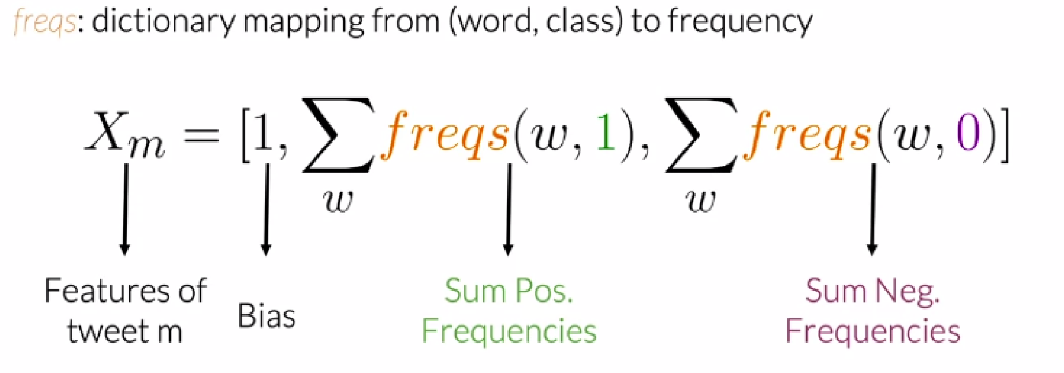

In [ ]:
Xm = []
for index , row in df_train.iterrows():
    tweetFeatureList = []
    posFreq = 0
    negFreq = 0
    for word in row["tweet"]:
        if (word,0) in wordFreq:
            posFreq += wordFreq[(word,0)]
        if (word,1) in wordFreq:
            negFreq += wordFreq[(word,1)]
    tweetFeatureList.append(1)
    tweetFeatureList.append(posFreq)
    tweetFeatureList.append(negFreq)
    Xm.append(tweetFeatureList)

In [ ]:
len(Xm)

In [ ]:
Xm

## Now we've a Matrix with shape m x 3 ready to be fed to Logistic Regression Model

# Logistic Regression Model

#### Convert Xm Matrix into Pandas dataframe

In [ ]:
data = pd.DataFrame(Xm,columns = ["Bias","PosFreq","NegFreq"])
data.head()

In [ ]:
df_train.reset_index(drop=True,inplace=True)

In [ ]:
data["Sentiment"] = df_train["label"]

In [ ]:
data.head()

#### Split Data into Features and Label

In [ ]:
X = data.drop("Sentiment",axis = 1)
y = data["Sentiment"]

#### Split data into Train and Validations

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

## Logistic Regression Implementation

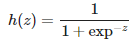

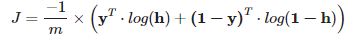

In [ ]:
y_train = y_train.to_numpy(dtype='float64')

In [ ]:
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
m = X_train.shape[0]
alpha = 1e-8
theta = np.zeros((3, 1))
for i in range(0, 1500):
    z = np.dot(X_train,theta)
    Ypred = 1/(1 + np.exp(-z))
    cost = -1/m * (np.dot(y_train.T, np.log(Ypred)) + np.dot((1-y_train).T,np.log(1-Ypred)))
    theta = theta - (alpha/m) * np.dot(X_train.T,(Ypred-y_train))
theta

In [ ]:
y_test = y_test.to_numpy(dtype='float64')
y_test = np.reshape(y_test,(y_test.shape[0],1))

# Test Logistic Regression Model

In [ ]:
ypredicted = []
ztest =np.dot(X_test,theta)
Ytest = 1/(1 + np.exp(-ztest))
for i in Ytest:
    if i > 0.5:
        ypredicted.append(1.0)
    else :
        ypredicted.append(0.0)
accuracy = (ypredicted==np.squeeze(y_test)).sum()/len(X_test)

In [ ]:
accuracy

### Logistic regression model's accuracy = 0.93352103

# Naive Bayes Model

#### create a probability for each class.
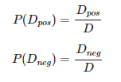

In [ ]:
X = df_train.drop("label",axis = 1)
y = df_train["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.2, random_state=42)

In [ ]:
ProbPos = y_train[y_train==0].shape[0] / y_train.shape[0]
ProbPos


In [ ]:
ProbNeg =  y_train[y_train==1].shape[0] / y_train.shape[0]
ProbNeg

#### Prior and Logprior
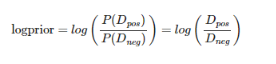

In [ ]:
import math
logPrior = math.log(ProbPos/ProbNeg) 

In [ ]:
logPrior

#### Loglikelihood
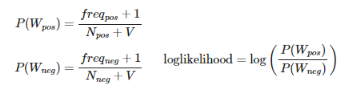

In [ ]:
Xm = []
V = set([pair[0] for pair in wordFreq.keys()])
NPos = NNeg = 0
for index , row in X_train.iterrows():
     for word in row["tweet"]:
        if (word,0) in wordFreq:
            NPos += wordFreq[(word,0)]
        if (word,1) in wordFreq:
            NNeg += wordFreq[(word,1)]
          
            
len(V)

In [ ]:
likelihoodMatrix= {}
for index , row in X_train.iterrows():
    ProbWPos = 0
    ProbWNeg = 0
    for word in row["tweet"]:
        if (word,0) in wordFreq:
            ProbWPos = (wordFreq[(word,0)]+1)/(NPos + len(V))
        else:
            ProbWPos = (0+1)/(NPos + len(V))
        if (word,1) in wordFreq:
            ProbWNeg = (wordFreq[(word,1)]+1)/(NNeg + len(V))
            
        else:
            ProbWNeg = (0+1)/(NNeg + len(V))
        LogLikelihood = math.log(ProbWPos / ProbWNeg)
        likelihoodMatrix[word] = LogLikelihood
likelihoodMatrix

In [ ]:
len(likelihoodMatrix)

# Train Naive Bayes
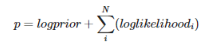

In [ ]:
YTrainPred = []
for tweet in X_train["tweet"]:
    p = 0
    for word in tweet: 
        p += (logPrior + likelihoodMatrix[word])
    if p > 0:
        YTrainPred.append(0)
    else: 
        YTrainPred.append(1)

# Test Naive Bayes

In [ ]:
error = np.mean(np.absolute(YTrainPred-y_train))
# Accuracy is 1 minus the error
accuracy = 1-error


In [ ]:
accuracy


## Accuracy of Naive Bayes Classifier = 0.9614376